In [2]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, numpy_utils, stats_utils
from model_fitting import initialize_fitting 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import argparse
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

In [11]:
# load LDA results
subject =1;
discrim_type='animacy';
which_prf_grid = 5

path_to_load = default_paths.sketch_token_feat_path
fn1 = os.path.join(path_to_load, 'S%d_mean_grid%d.npy'%(subject, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_var_grid%d.npy'%(subject, which_prf_grid))
print('loading from %s and %s'%(fn1, fn2))
mean_result = np.load(fn1,allow_pickle=True)
var_result = np.load(fn2,allow_pickle=True)

path_to_save = os.path.join(path_to_load, 'LDA')
if which_prf_grid !=1:
    fn2save = os.path.join(path_to_save, 'S%d_LDA_%s_grid%d.npy'%(subject, discrim_type, which_prf_grid))
else:
    fn2save = os.path.join(path_to_save, 'S%d_LDA_%s.npy'%(subject, discrim_type))
print('loading from %s'%fn2save)
lda_result = np.load(fn2save,allow_pickle=True).item()

loading from /user_data/mmhender/features/sketch_tokens/S1_mean_grid5.npy and /user_data/mmhender/features/sketch_tokens/S1_var_grid5.npy
loading from /user_data/mmhender/features/sketch_tokens/LDA/S1_LDA_animacy_grid5.npy


In [4]:
# Params for the spatial aspect of the model (possible pRFs)
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    
n_prfs = models.shape[0]

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


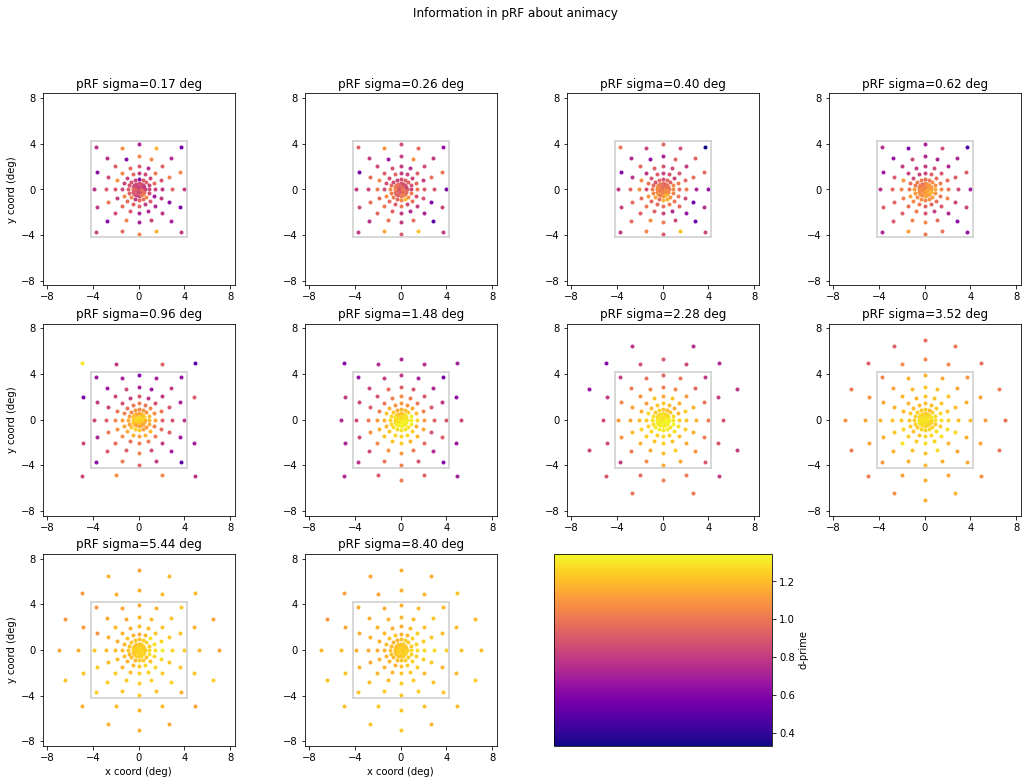

In [5]:
prf_models = models

unique_sizes = np.unique(np.round(prf_models[:,2],4))

fig = plt.figure(figsize=(18,12));

n_color_steps = 100
colors = cm.plasma(np.linspace(0,1,n_color_steps))
min_dprime = 0
dprime_vals = np.array(lda_result['val_dprime'])
dprime_range = [np.min(dprime_vals[dprime_vals>min_dprime]), \
                np.max(dprime_vals[dprime_vals>min_dprime])]
# dprime_range = [0, 1.4]
dprime_steps = np.linspace(dprime_range[0], dprime_range[1], n_color_steps)
screen_eccen_deg = 8.4
xylims = 1.0*screen_eccen_deg

for si, size in enumerate(unique_sizes):

    inds = np.where(np.round(prf_models[:,2],4)==size)[0]

    prf_models_plot = models[inds,:]
    dprime_plot = np.array(lda_result['val_dprime'])[inds]
    inds2plot = np.where(dprime_plot>min_dprime)[0]
    
    plt.subplot(3,4,si+1)
    ax = plt.gca()
        
    for mm in inds2plot:
        x,y,sigma = prf_models_plot[mm,:]
        dprime = dprime_plot[mm]
        color_ind = np.argmin(np.abs(dprime_steps-dprime))
        plt.plot(x*screen_eccen_deg,y*screen_eccen_deg,'.', color=colors[color_ind,:])  
        
    plt.axis('square')
    plt.xlim([-xylims, xylims])
    plt.ylim([-xylims, xylims])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))
    
    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF sigma=%.2f deg'%(size*screen_eccen_deg))
    
ax = plt.subplot(3,4,si+2)
scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=dprime_range[0], vmax=dprime_range[1]),\
                  cmap='plasma')
fig.colorbar(scalmap, orientation='vertical', label='d-prime',cax=ax)

plt.suptitle('Information in pRF about %s'%discrim_type);

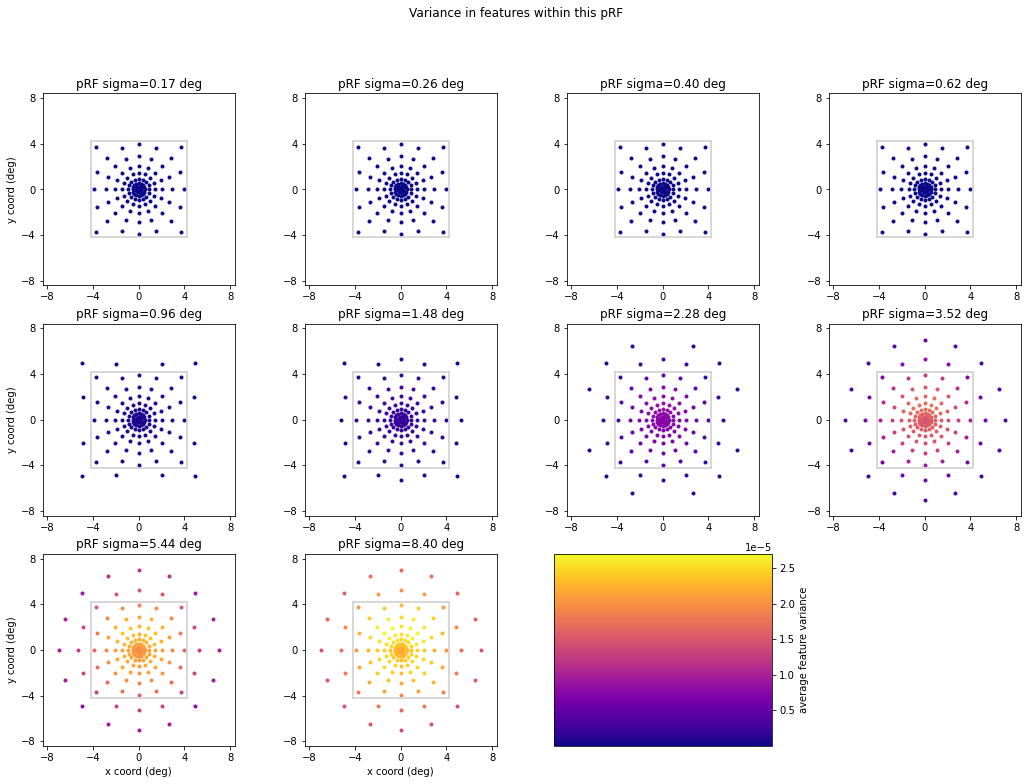

In [12]:
prf_models = models

unique_sizes = np.unique(np.round(prf_models[:,2],4))

fig = plt.figure(figsize=(18,12));

n_color_steps = 100
colors = cm.plasma(np.linspace(0,1,n_color_steps))
vals = np.mean(var_result, axis=0)
vals_range = [np.min(vals), \
                np.max(vals)]
# dprime_range = [0, 1.4]
vals_steps = np.linspace(vals_range[0], vals_range[1], n_color_steps)
screen_eccen_deg = 8.4
xylims = 1.0*screen_eccen_deg

for si, size in enumerate(unique_sizes):

    inds = np.where(np.round(prf_models[:,2],4)==size)[0]

    prf_models_plot = models[inds,:]
    vals_plot = np.array(vals)[inds]
    inds2plot = np.where(vals_plot>-100)[0]
    
    plt.subplot(3,4,si+1)
    ax = plt.gca()
        
    for mm in inds2plot:
        x,y,sigma = prf_models_plot[mm,:]
        val = vals_plot[mm]
        color_ind = np.argmin(np.abs(vals_steps-val))
        plt.plot(x*screen_eccen_deg,y*screen_eccen_deg,'.', color=colors[color_ind,:])  
        
    plt.axis('square')
    plt.xlim([-xylims, xylims])
    plt.ylim([-xylims, xylims])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))
    
    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF sigma=%.2f deg'%(size*screen_eccen_deg))
    
ax = plt.subplot(3,4,si+2)
scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=vals_range[0], vmax=vals_range[1]),\
                  cmap='plasma')
fig.colorbar(scalmap, orientation='vertical', label='average feature variance',cax=ax)

plt.suptitle('Variance in features within this pRF');

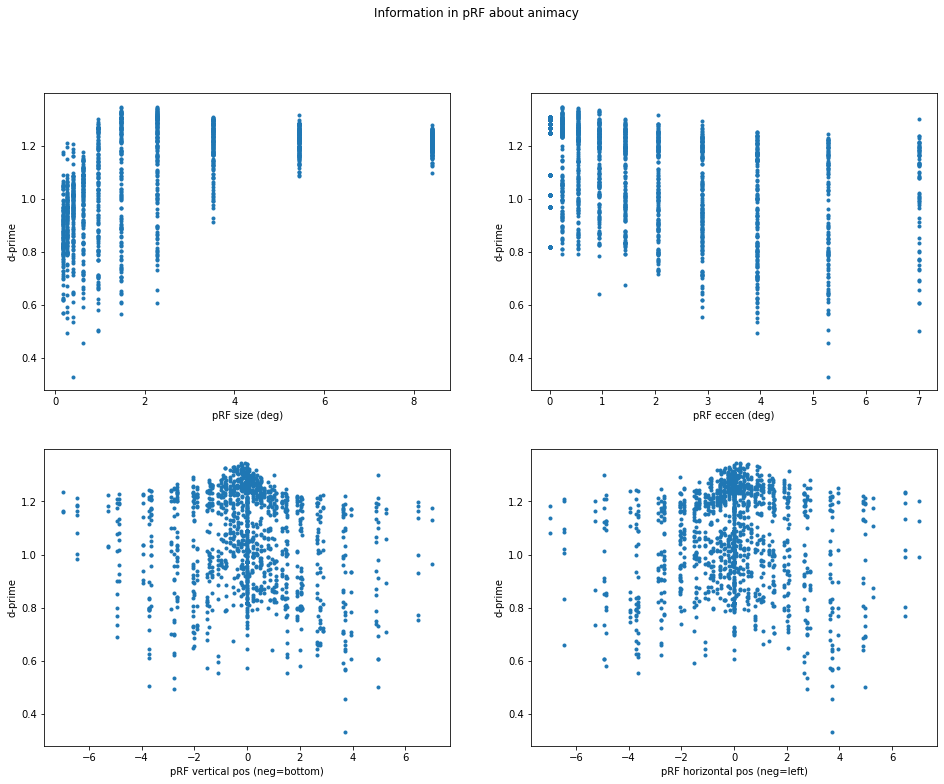

In [6]:
plt.figure(figsize=(16,12));
dprime_vals = np.array(lda_result['val_dprime'])

plt.subplot(2,2,1)
plt.plot(models[:,2]*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF size (deg)')
plt.ylabel('d-prime')

plt.subplot(2,2,2)
plt.plot(np.sqrt(models[:,0]**2+models[:,1]**2)*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF eccen (deg)')
plt.ylabel('d-prime')

plt.subplot(2,2,3)
plt.plot(models[:,1]*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF vertical pos (neg=bottom)')
plt.ylabel('d-prime')

plt.subplot(2,2,4)
plt.plot(models[:,0]*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF horizontal pos (neg=left)')
plt.ylabel('d-prime')

plt.suptitle('Information in pRF about %s'%discrim_type);

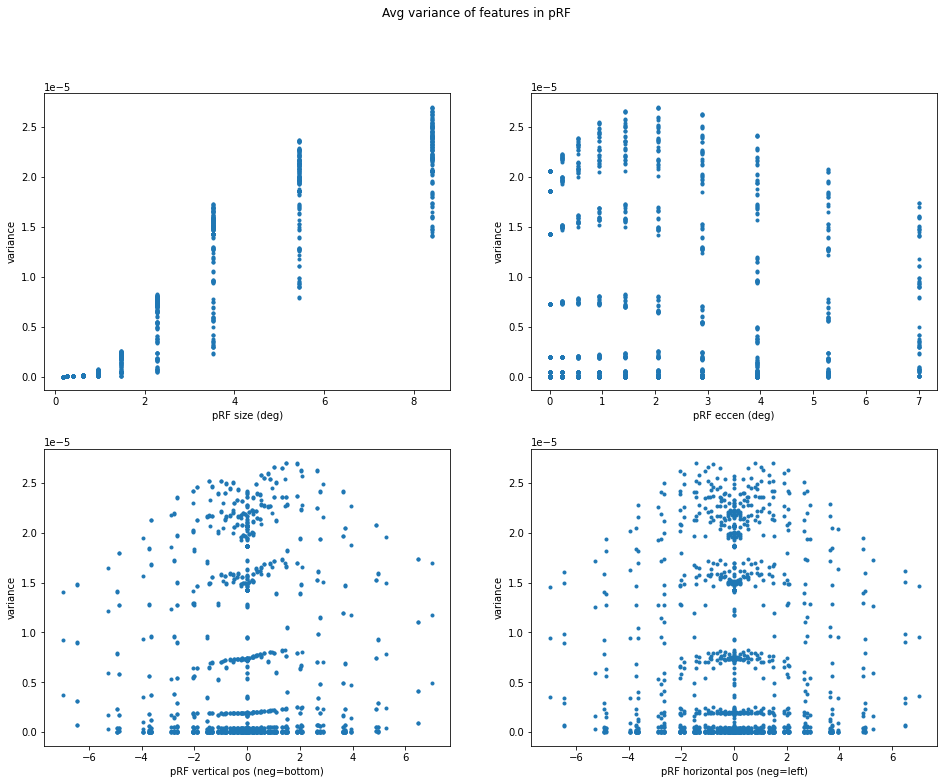

In [15]:
plt.figure(figsize=(16,12));
var_vals = np.mean(var_result, axis=0)

plt.subplot(2,2,1)
plt.plot(models[:,2]*screen_eccen_deg, var_vals,'.')
plt.xlabel('pRF size (deg)')
plt.ylabel('variance')

plt.subplot(2,2,2)
plt.plot(np.sqrt(models[:,0]**2+models[:,1]**2)*screen_eccen_deg, var_vals,'.')
plt.xlabel('pRF eccen (deg)')
plt.ylabel('variance')

plt.subplot(2,2,3)
plt.plot(models[:,1]*screen_eccen_deg, var_vals,'.')
plt.xlabel('pRF vertical pos (neg=bottom)')
plt.ylabel('variance')

plt.subplot(2,2,4)
plt.plot(models[:,0]*screen_eccen_deg, var_vals,'.')
plt.xlabel('pRF horizontal pos (neg=left)')
plt.ylabel('variance')

plt.suptitle('Avg variance of features in pRF');

In [7]:
# Load results of the fitting procedure - going to look at how above results relate to pRF 
# fits in different areas

from plotting import load_fits
subject = 1
volume_space=True
fitting_type = 'sketch_tokens'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type, \
                                                  n_from_end=0, root=root, verbose=True);
# load_fits.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-27-2021_1805_34/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'corr_each_feature', 'discrim_each_axis', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])


In [8]:
out['models'].shape

(1456, 3)

In [8]:
from utils import roi_utils
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 
skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def
roi_names = ret_names+face_names+place_names+body_names
nret = len(ret_names)
nface = len(face_names)
nplace = len(place_names)
nbody = len(body_names)    
n_rois = len(ret_names) + len(face_names) + len(place_names) + len(body_names)

is_ret = np.arange(0, n_rois)<nret
is_face = (np.arange(0, n_rois)>=nret) & (np.arange(0, n_rois)<nret+nface)
is_place = (np.arange(0, n_rois)>=nret+nface) & (np.arange(0, n_rois)<nret+nface+nplace)
is_body = np.arange(0, n_rois)>=nret+nface+nplace


Text(0, 0.5, 'n voxels preferring this pRF')

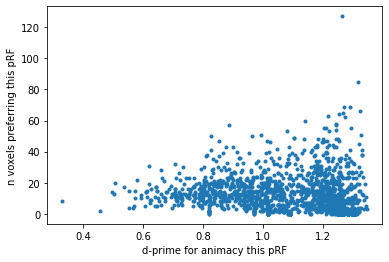

In [9]:
prf_models = models

dprime_vals = np.array(lda_result['val_dprime'])
neach = np.array([np.sum(out['best_params'][5][:,0]==mm) for mm in range(n_prfs)])

plt.figure();

plt.plot(dprime_vals, neach,'.')
plt.xlabel('d-prime for %s this pRF'%(discrim_type))
plt.ylabel('n voxels preferring this pRF')

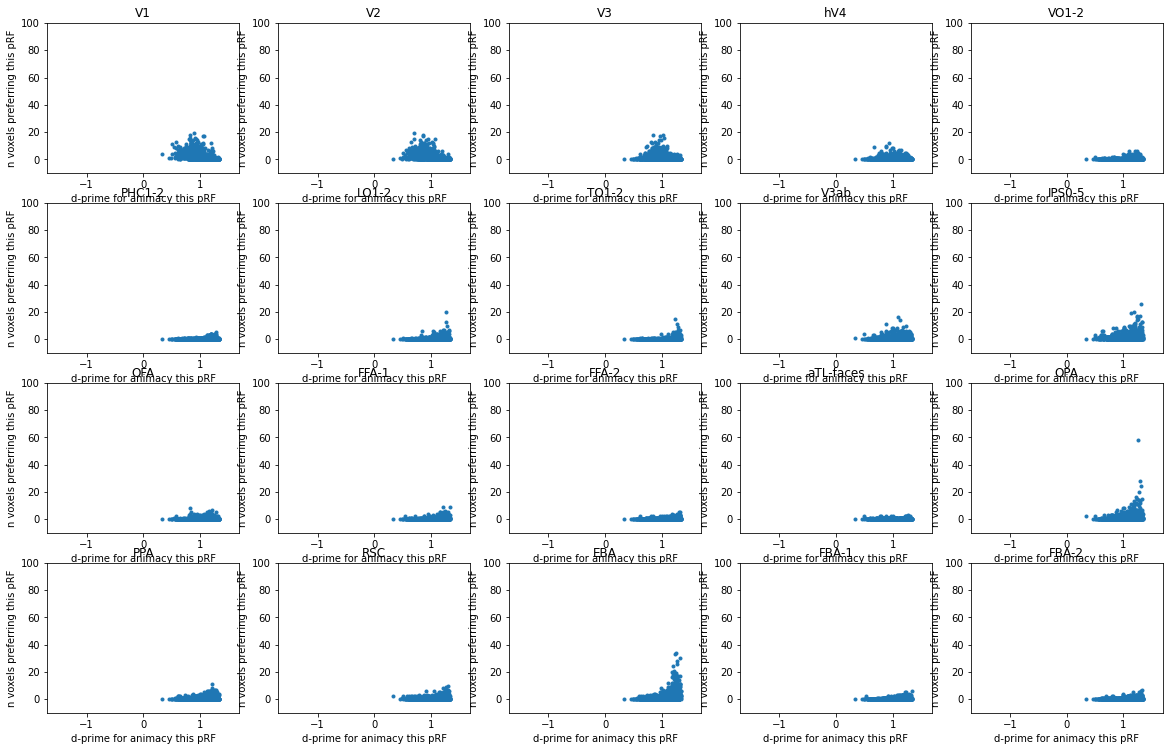

In [10]:
prf_models = models

dprime_vals = np.array(lda_result['val_dprime'])


plt.figure(figsize=(20,16))
npx = int(np.ceil(np.sqrt(n_rois)))
npy = int(np.ceil(n_rois/npx))

pi=0
for rr in range(n_rois):

    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
            rname = ret_names[rr]
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
            rname = face_names[rr-nret]
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
            rname = place_names[rr-nret-nface]
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
            rname = body_names[rr-nret-nface-nplace]

        pi+=1
        plt.subplot(npx,npy,pi)
        neach = np.array([np.sum(out['best_params'][5][inds_this_roi,0]==mm) for mm in range(n_prfs)])

        plt.plot(dprime_vals, neach,'.')
        plt.xlabel('d-prime for %s this pRF'%(discrim_type))
        plt.ylabel('n voxels preferring this pRF')
        plt.title(rname)
        plt.xlim([-1.7, 1.7])
        plt.ylim([-10,100])


In [12]:
dprime_vals.shape

(1456,)

Text(0.5, 0.98, 'Number of voxels all areas with this pRF')

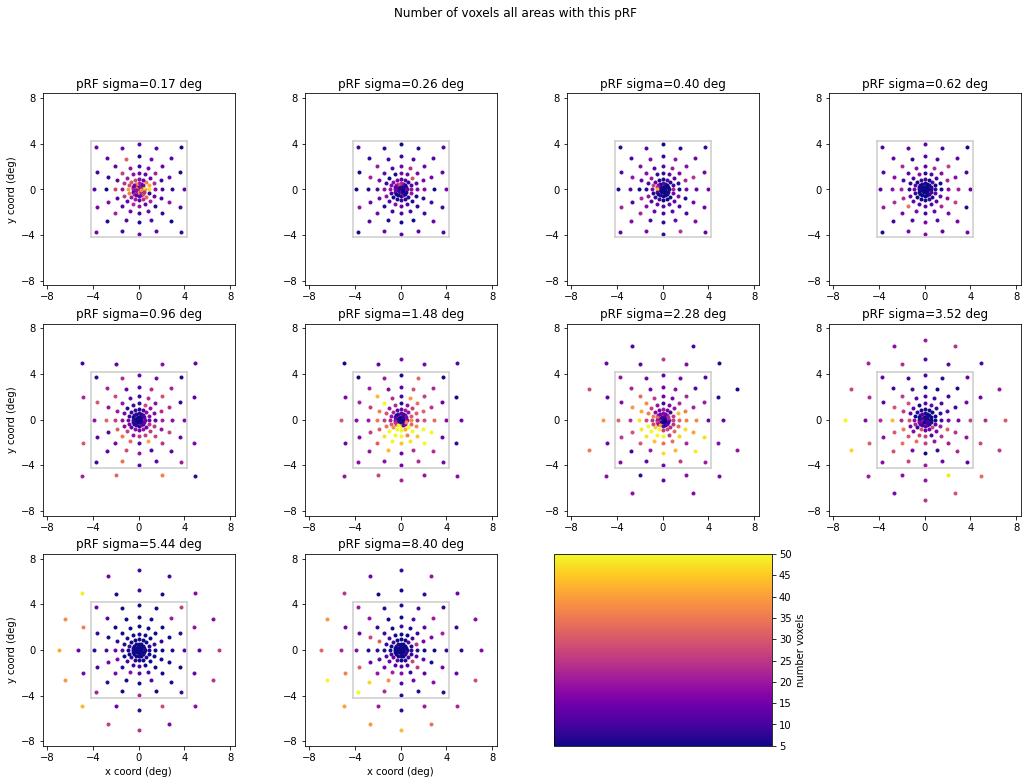

In [13]:
prf_models = models
neach = np.array([np.sum(out['best_params'][5][:,0]==mm) for mm in range(n_prfs)])
unique_sizes = np.unique(np.round(prf_models[:,2],4))

fig = plt.figure(figsize=(18,12));

n_color_steps = np.max(neach)
colors = cm.plasma(np.linspace(0,1,n_color_steps))
# vals_range = [np.min(neach), \
#                 np.max(neach)]
vals_range = [5,50]
vals_steps = np.linspace(vals_range[0], vals_range[1], n_color_steps)
screen_eccen_deg = 8.4
xylims = 1.0*screen_eccen_deg

for si, size in enumerate(unique_sizes):

    inds = np.where(np.round(prf_models[:,2],4)==size)[0]

    prf_models_plot = models[inds,:]
    vals_plot = neach[inds]
#     dprime_plot = np.array(lda_result['val_dprime'])[inds]
    plt.subplot(3,4,si+1)
    ax = plt.gca()
        
    for mm in range(len(prf_models_plot)):
        x,y,sigma = prf_models_plot[mm,:]
#         dprime = dprime_plot[mm]
        val = vals_plot[mm]
        color_ind = np.argmin(np.abs(vals_steps-val))
#         print(colors[color_ind,:])
        plt.plot(x*screen_eccen_deg,y*screen_eccen_deg,'.', color=colors[color_ind,:])  
        
    plt.axis('square')
    plt.xlim([-xylims, xylims])
    plt.ylim([-xylims, xylims])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))
    
    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF sigma=%.2f deg'%(size*screen_eccen_deg))
    
ax = plt.subplot(3,4,si+2)
scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=vals_range[0], vmax=vals_range[1]),\
                  cmap='plasma')
fig.colorbar(scalmap, orientation='vertical', label='number voxels',cax=ax)

plt.suptitle('Number of voxels all areas with this pRF')